# Trabalho da segunda unidade de Probabilidade
Esse trabalho possui como objetivo análisar os dados referentes a pesquisa no Instituto Metrópole Digital (IMD).

**Componentes**:
- <a href="https://github.com/alvarofpp">Álvaro Ferreira Pires de Paiva</a>
  - Matrícula: 2016039162
  - E-mail: alvarofepipa@gmail.com
- <a href="https://github.com/davir8">Davi Rodrigues de Medeiros</a>
  - Matrícula: 20160143888
  - E-mail: davirodrigues8@gmail.com

## Dados
Os dados utilizados forma retirados do site de <a href="http://dados.ufrn.br/">dados abertos da UFRN</a>. Foram utilizados os seguintes dados:
- <a href="http://dados.ufrn.br/dataset/bolsistas-de-iniciacao-cientifica">Bolsistas de Iniciação Científica</a>
- <a href="http://dados.ufrn.br/dataset/discentes">Discentes</a>
- <a href="http://dados.ufrn.br/dataset/docentes">Docentes</a>
- <a href="http://dados.ufrn.br/dataset/pesquisadores">Pesquisadores</a>
- <a href="http://dados.ufrn.br/dataset/projetos-de-pesquisa">Projetos de pesquisa</a>


###### Sumário
- [Preparando o ambiente](#ambiente)
- [Tratamento dos dados](#tratamento)
  - [Vinculação](#vinculacao)
- [Análise de dados](#analise)

## <a id="ambiente">Preparando o ambiente</a>
Nessa seção, iremos declarar as variáveis globais que iremos utilizar durante esse notebook, importar as libs necessárias e preparar os arquivos que temos para podermos utilizá-los nas seções seguintes.

In [1]:
# Imports
import os
import pandas as pd

In [2]:
# Caminhos dos arquivos
path_files = "files/"
path_discentes = path_files + "discentes/"

# Ids
id_imd = 6069

A seguir, iremos filtrar os **discentes** para, exclusivamente, os que ingressaram no curso de Tecnologia da Informação.

In [3]:
# Iremos pegar todos os discentes e filtrar-los em apenas os discentes do IMD
df_ingressantes_imd = pd.DataFrame()

for root, dirs, files in os.walk(path_discentes):
    for filename in files:
        print(root + filename)
        df_ingressantes = pd.read_csv((root + filename), sep=';')
        df_ingressantes_filter = df_ingressantes[df_ingressantes.nome_curso == "TECNOLOGIA DA INFORMAÇÃO"]
        df_ingressantes_imd = pd.concat([df_ingressantes_imd, df_ingressantes_filter])

files/discentes/discentes-2013
files/discentes/discentes-2018
files/discentes/discentes-2017
files/discentes/discentes-2014
files/discentes/discentes-2016
files/discentes/discentes-2015


In [4]:
# Remove as colunas que não nos servem para nada
df_ingressantes_imd = df_ingressantes_imd.drop(columns=['sigla_nivel_ensino', 'nivel_ensino',
                                  'id_curso', 'nome_curso',
                                  'id_unidade', 'nome_unidade',
                                 'id_unidade_gestora', 'nome_unidade_gestora'])

# Converte colunas que são float, mas deveriam ser double
df_ingressantes_imd.matricula = df_ingressantes_imd.matricula.astype('int64')
df_ingressantes_imd.periodo_ingresso = df_ingressantes_imd.periodo_ingresso.astype('int64')

In [5]:
df_ingressantes_imd.head()

,matricula,nome_discente,ano_ingresso,periodo_ingresso,forma_ingresso,tipo_discente,status,modalidade_educacao
80,2013019611,ADEMIR BEZERRA DA SILVA JUNIOR,2013,1,VESTIBULAR,REGULAR,CONCLUÍDO,PRESENCIAL
122,2013055903,ADONIAS GALVÃO FILHO,2013,1,SiSU,REGULAR,ATIVO,PRESENCIAL
490,2013046600,ALESON BELO DA SILVA,2013,1,SiSU,REGULAR,CANCELADO,PRESENCIAL
596,2013042431,ALEXANDRE TADEU DE FIGUEIREDO AZEVEDO,2013,1,SiSU,REGULAR,CANCELADO,PRESENCIAL
622,2013050630,ALEXIS JORDÃO GONÇALVES PEREIRA,2013,1,VESTIBULAR,REGULAR,CONCLUÍDO,PRESENCIAL


In [6]:
# Salvamos o arquivo
df_ingressantes_imd.to_csv('data/discentes_imd.csv')

Agora iremos filtrar os **docentes** para, exclusivamente, os docentes que possuem como unidade de lotação o Instituto Metrópole Digital.

In [7]:
# Todos os docentes
df_docentes = pd.read_csv(('files/docentes.csv'), sep=';')

# Filtramos para os que são do IMD
df_docentes_imd = df_docentes[df_docentes.id_unidade_lotacao == id_imd]

# Remove as colunas que não nos servem para nada
df_docentes_imd = df_docentes_imd.drop(columns=['siape', 'Unnamed: 11',
                                  'id_unidade_lotacao', 'lotacao'])

df_docentes_imd.head()

,id_servidor,nome,formacao,tipo_jornada_trabalho,vinculo,categoria,classe_funcional,admissao
13,5757141,ALUIZIO FERREIRA DA ROCHA NETO,MESTRADO,Dedicação exclusiva,Ativo Permanente,PROFESSOR DE ENSINO BASICO TECNICO E TECNOLOGICO,DIII ...,2015-01-28 00:00:00
15,5756816,ALYSON MATHEUS DE CARVALHO SOUZA,MESTRADO,Dedicação exclusiva,Ativo Permanente,PROFESSOR DE ENSINO BASICO TECNICO E TECNOLOGICO,DIII ...,2014-07-11 00:00:00
25,5756955,ANDRE LUIZ DE SOUZA BRITO,MESTRADO,Dedicação exclusiva,Ativo Permanente,PROFESSOR DE ENSINO BASICO TECNICO E TECNOLOGICO,DIII ...,2014-07-15 00:00:00
33,5757540,ANTONIO IGOR SILVA DE OLIVEIRA,MESTRADO,Dedicação exclusiva,Ativo Permanente,PROFESSOR DE ENSINO BASICO TECNICO E TECNOLOGICO,DI ...,2015-05-26 00:00:00
34,5757618,ANTONIO WALLACE ANTUNES SOARES,MESTRADO,Dedicação exclusiva,Ativo Permanente,PROFESSOR DE ENSINO BASICO TECNICO E TECNOLOGICO,DI ...,2015-07-31 00:00:00


In [8]:
# Salvamos o arquivo
df_docentes_imd.to_csv('data/docentes_imd.csv')

Agora iremos filtrar os **bolsista de iniciação científica** para, exclusivamente, os discentes do curso de Tecnologia da Informação.

In [9]:
# Todos os bolsistas de iniciação científica
df_bolsistas = pd.read_csv(('files/bolsistas-de-iniciacao-cientifica.csv'), sep=';')

# Filtramos para os que são do IMD
df_bolsistas_imd = df_bolsistas[df_bolsistas.id_unidade == id_imd]

# Remove as colunas que não nos servem para nada
df_bolsistas_imd = df_bolsistas_imd.drop(columns=['Unnamed: 20',
                                  'id_unidade', 'unidade'])

df_bolsistas_imd.head()

,id_discente,matricula,discente,titulo,codigo_projeto,id_projeto_pesquisa,ano,id_orientador,orientador,categoria,tipo_de_bolsa,linha_pesquisa,id_grupo_pesquisa,grupo_pesquisa,cota,inicio,fim,status
768,657578,2014068307,ALICE GABRIELA ALVES DE SALES FARIAS,Modulo de comunicação para sistema Embarcado d...,PIT12872-2016,117151961,2016,5756871,EDUARDO NOGUEIRA CUNHA,Iniciação Científica (IC),VOLUNTÁRIO,Monitoramento Residencial,NaN,NaN,2016-2017,2016-08-10,NaN,PENDENTE DE RELATORIO
1030,693925,2015041845,ALLAN VALDIVINO GONÇALVES,Detecção de Code Smells em sistemas Python,PIT14429-2017,123478649,2017,5757883,EIJI ADACHI MEDEIROS BARBOSA,Iniciação Científica (IC),VOLUNTÁRIO,Engenharia de Software,NaN,NaN,2017-2018,2017-08-02,NaN,EM ANDAMENTO
1294,693430,2015032710,AMANDA MARIA DOMINGOS DE OLIVEIRA,OBJETOS DE APRENDIZAGEM PARA O ENSINO DE MATEM...,PIT12982-2016,117612151,2016,5757088,DENNYS LEITE MAIA,Iniciação Tecnológica (IT),PIBITI UFRN,Formação de professores de Matemática,NaN,NaN,2017-2018,2017-08-05,NaN,EM ANDAMENTO
1295,693430,2015032710,AMANDA MARIA DOMINGOS DE OLIVEIRA,Objetos de aprendizagem para o ensino de Matem...,PIT12982-2016,117612151,2016,5757088,DENNYS LEITE MAIA,Iniciação Tecnológica (IT),PIBITI UFRN,Formação de professores de Matemática,NaN,NaN,2016-2017,2016-08-06,NaN,FINALIZADO
1658,642002,2014023889,ANA CLAUDIA NUNES SILVA,Objetos de aprendizagem para o ensino de Matem...,PIT12982-2016,117612151,2016,5757088,DENNYS LEITE MAIA,Iniciação Tecnológica (IT),PIBITI UFRN,Formação de professores de Matemática,NaN,NaN,2016-2017,2016-08-08,NaN,FINALIZADO


In [10]:
# Salvamos o arquivo
df_bolsistas_imd.to_csv('data/bolsistas_imd.csv')

Agora iremos pegar os **projetos de pesquisa** realizados no IMD.

In [11]:
# Todos os projetos de pesquisa
df_projetos_pesquisa = pd.read_csv('files/projetos-de-pesquisa.csv', sep=';')

# Filtramos para os que são do IMD
df_projetos_pesquisa_imd = df_projetos_pesquisa[df_projetos_pesquisa.id_unidade == id_imd]

# Remove as colunas que não nos servem para nada
df_projetos_pesquisa_imd = df_projetos_pesquisa_imd.drop(columns=['Unnamed: 20',
                                                                  'id_unidade', 'unidade'])

df_projetos_pesquisa_imd.head()

,id_projeto_pesquisa,codigo_projeto,titulo,palavras_chave,id_projeto,ano,data_inicio,data_fim,situacao,tipo_projeto,categoria_projeto,id_coordenador,coordenador,edital,id_grupo_pesquisa,grupo_pesquisa,linha_pesquisa,area_conhecimento_cnpq


In [12]:
# Salvamos o arquivo
df_projetos_pesquisa_imd.to_csv('data/projetos_imd.csv')

Agora iremos pegar os **pesquisadores** vinculados ao IMD.

In [13]:
# Todos os pesquisadores
df_pesquisadores = pd.read_csv('files/pesquisadores.csv', sep=';')

# Filtramos para os que são do IMD
df_pesquisadores_imd = df_pesquisadores[df_pesquisadores.id_unidade == id_imd]

# Remove as colunas que não nos servem para nada
df_pesquisadores_imd = df_pesquisadores_imd.drop(columns=['Unnamed: 9', 'id_unidade', 'unidade',
                                                         'id_centro', 'centro'])

df_pesquisadores_imd.head()

,id_servidor,nome,coordenador,internos,externos
86,5757141,ALUIZIO FERREIRA DA ROCHA NETO,1,1,1
89,5756816,ALYSON MATHEUS DE CARVALHO SOUZA,1,2,0
138,5755819,ANDERSON PAIVA CRUZ,0,0,1
188,5757540,ANTONIO IGOR SILVA DE OLIVEIRA,0,1,0
194,5757618,ANTONIO WALLACE ANTUNES SOARES,0,1,1


In [14]:
# Salvamos o arquivo
df_pesquisadores_imd.to_csv('data/pesquisadores_imd.csv')

## <a id="tratamento">Tratamento dos dados</a>
Nessa seção, iremos tratar os dados de arquivos diferentes, de forma que iremos conseguir juntar dados de multiplos arquivos em um só, a fim de facilitar as análises que podemos realizar posteriormente.

### <a id="vinculacao">Vinculação</a>
Aqui iremos vincular diferentes arquivos de dados, a fim de gerarmos arquivos finais para facilitar a exibição de gráficos e afins.

Agora iremos fazer o merge com as informações dos bolsista de iniciação científica e dos discentes do Instituto Metrópole Digital.

In [15]:
# Merge entre os discentes e os bolsistas do imd utilizando como base a coluna matricula
df_discentes_bolsistas = pd.merge(df_ingressantes_imd, df_bolsistas_imd, on='matricula')

df_discentes_bolsistas.head()

,matricula,nome_discente,ano_ingresso,periodo_ingresso,forma_ingresso,tipo_discente,status_x,modalidade_educacao,id_discente,discente,...,orientador,categoria,tipo_de_bolsa,linha_pesquisa,id_grupo_pesquisa,grupo_pesquisa,cota,inicio,fim,status_y
0,2013019470,ANDERSON MATHEUS SILVA,2013,1,VESTIBULAR,REGULAR,CONCLUÍDO,PRESENCIAL,594670,ANDERSON MATHEUS SILVA,...,GUSTAVO GIRAO BARRETO DA SILVA,Iniciação Tecnológica (IT),PROPESQ,Sistemas Embarcados,NaN,NaN,2015-2016 Propesq,2015-08-03,2016-07-31 00:00:00,FINALIZADO
1,2013018973,CIRO MARTINS PINTO,2013,1,VESTIBULAR,REGULAR,CONCLUÍDO,PRESENCIAL,594676,CIRO MARTINS PINTO,...,RAFAEL VIDAL AROCA,Iniciação Científica (IC),PIBIC,Sistemas Embarcados,NaN,NaN,2013-2014,2013-07-29,2014-07-31 00:00:00,FINALIZADO
2,2013046851,DANIEL TIAGO DE SOUZA BRITO,2013,1,VESTIBULAR,REGULAR,ATIVO - FORMANDO,PRESENCIAL,597254,DANIEL TIAGO DE SOUZA BRITO,...,DENNYS LEITE MAIA,Iniciação Científica (IC),VOLUNTÁRIO,Formação de professores de Matemática,NaN,NaN,2016-2017,2016-09-08,2017-06-13 00:00:00,PENDENTE DE RELATORIO
3,2013017608,FRANCISCO LAÉRCIO DE MORAIS,2013,1,VESTIBULAR,REGULAR,CONCLUÍDO,PRESENCIAL,594682,FRANCISCO LAÉRCIO DE MORAIS,...,GUSTAVO GIRAO BARRETO DA SILVA,Iniciação Científica (IC),PIBIC UFRN,Sistemas Embarcados,NaN,NaN,2016-2017,2016-08-08,2017-04-06 00:00:00,PENDENTE DE RELATORIO
4,2013017608,FRANCISCO LAÉRCIO DE MORAIS,2013,1,VESTIBULAR,REGULAR,CONCLUÍDO,PRESENCIAL,594682,FRANCISCO LAÉRCIO DE MORAIS,...,GUSTAVO GIRAO BARRETO DA SILVA,Iniciação Científica (IC),PROPESQ,Sistemas Embarcados,NaN,NaN,2015-2016 Propesq,2015-08-05,2016-07-31 00:00:00,FINALIZADO


In [16]:
# Salvamos o arquivo
df_discentes_bolsistas.to_csv('data/discentes_bolsistas_imd.csv')

### <a id="analise">Analise dos dados</a>
Aqui iremos analisar os dados dos discentes de Tecnologia da Informação utilizando gráficos e consultas estudados em sala de aula.

###### Discentes ingressantes do BTI

In [68]:
# Total de alunos ingressantes em Tecnologia da Informação
df_ingressantes_imd.matricula.count()

1518

Text(8.723,0.5,'Quantidade')

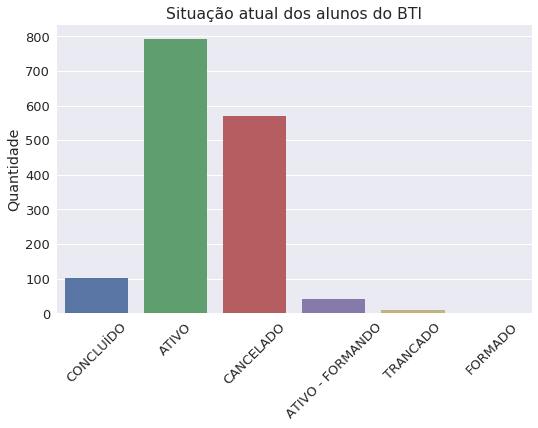

In [71]:
import seaborn as sns
# carregar a configuração padrão de cores do Seaborn
sns.set(font_scale=1.3)

# Criamos um gráfico de barras com a situação de todos os estudante do BTI
g = sns.factorplot("status", data=df_ingressantes_imd, kind="count", size=5, aspect=1.5)
g.set_xticklabels(rotation=45)
plt.title('Situação atual dos alunos do BTI')
plt.xlabel('')
plt.ylabel('Quantidade')

###### Discentes bolsistas de iniciação científica
Aqui analisamos os dados obtidos pelo merge entre discentes e bolsistas. Essa análise foi feita utilizando gráficos e consultas estudados em sala de aula.

In [39]:
# Qual os tipos e número de bolsas de iniciação científica dos discentes do BTI?
df_discentes_bolsistas.categoria.value_counts()

Iniciação Científica (IC)     56
Iniciação Tecnológica (IT)    14
Name: categoria, dtype: int64

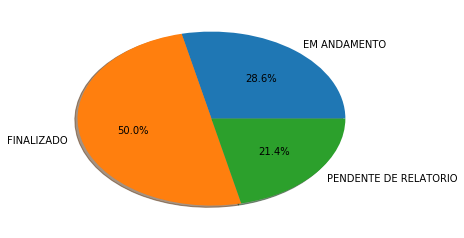

In [36]:
# Qual a situação atual das bolsas de iniciação cientifica dos alunos do BTI?
bolsas = dict(df_discentes_bolsistas.groupby('status_y')['matricula'].count())

# Definimos as caracteristicas do gráfico de pizza e mostramos
plt.pie(list(bolsas.values()), labels=list(bolsas.keys()),autopct='%1.1f%%', shadow=True)
plt.show()

In [72]:
# Quais são os alunos do BTI que possuem bolsas de iniciação científica atualmente
df_discentes_bolsistas[(df_discentes_bolsistas.status_x == 'ATIVO') & (df_discentes_bolsistas.status_y != 'FINALIZADO')]

,matricula,nome_discente,ano_ingresso,periodo_ingresso,forma_ingresso,tipo_discente,status_x,modalidade_educacao,id_discente,discente,...,orientador,categoria,tipo_de_bolsa,linha_pesquisa,id_grupo_pesquisa,grupo_pesquisa,cota,inicio,fim,status_y
17,2013020532,RENNO FRANK DE MELO XAVIER,2013,1,VESTIBULAR,REGULAR,ATIVO,PRESENCIAL,594658,RENNO FRANK DE MELO XAVIER,...,ISABEL DILLMANN NUNES,Iniciação Científica (IC),VOLUNTÁRIO,Análise de Dados Educacionais,125841829.0,Ciência Cognitiva e de Dados,2017-2018,2017-09-15,NaN,EM ANDAMENTO
33,2016044304,ANDERSON CAIO DA FONSECA SANTOS,2016,1,SiSU,REGULAR,ATIVO,PRESENCIAL,714393,ANDERSON CAIO DA FONSECA SANTOS,...,ALYSON MATHEUS DE CARVALHO SOUZA,Iniciação Científica (IC),VOLUNTÁRIO,"Computação Científica, Visualização 3D , Reali...",NaN,NaN,2017,2017-09-13,NaN,PENDENTE DE RELATORIO
35,2016041661,DANIEL MARX PINTO CARVALHO,2016,1,SiSU,REGULAR,ATIVO,PRESENCIAL,714261,DANIEL MARX PINTO CARVALHO,...,ALUIZIO FERREIRA DA ROCHA NETO,Iniciação Científica (IC),VOLUNTÁRIO,Desenvolvimento de Aplicações para Cidades Int...,NaN,NaN,2017-2018,2017-09-04,NaN,EM ANDAMENTO
36,2016036840,DANIEL MIQUEIAS DO NASCIMENTO BARBOSA,2016,1,SiSU,REGULAR,ATIVO,PRESENCIAL,714020,DANIEL MIQUEIAS DO NASCIMENTO BARBOSA,...,ALYSON MATHEUS DE CARVALHO SOUZA,Iniciação Científica (IC),PIBIC UFRN,"Computação Científica, Visualização 3D , Reali...",NaN,NaN,2017-2018,2017-08-04,NaN,EM ANDAMENTO
37,2016036840,DANIEL MIQUEIAS DO NASCIMENTO BARBOSA,2016,1,SiSU,REGULAR,ATIVO,PRESENCIAL,714020,DANIEL MIQUEIAS DO NASCIMENTO BARBOSA,...,ALYSON MATHEUS DE CARVALHO SOUZA,Iniciação Científica (IC),VOLUNTÁRIO,"Computação Científica, Visualização 3D , Reali...",NaN,NaN,2017,2017-01-30,2017-08-04 00:00:00,PENDENTE DE RELATORIO
41,2016091387,JEFFERSON RAYLAN NASCIMENTO DE MACÊDO,2016,1,SiSU,REGULAR,ATIVO,PRESENCIAL,716902,JEFFERSON RAYLAN NASCIMENTO DE MACÊDO,...,CARLOS EDUARDO DA SILVA,Iniciação Tecnológica (IT),PIBITI UFRN,Desenvolvimento de Aplicações para Cidades Int...,NaN,NaN,2016-2017,2017-06-02,NaN,PENDENTE DE RELATORIO
42,2016044126,LUÍS EDUARDO ANUNCIADO SILVA,2016,1,SiSU,REGULAR,ATIVO,PRESENCIAL,714384,LUÍS EDUARDO ANUNCIADO SILVA,...,LEONARDO CESAR TEONACIO BEZERRA,Iniciação Científica (IC),PIBIC UFRN,Computação Cognitiva,125841829.0,Ciência Cognitiva e de Dados,2017-2018,2017-08-04,NaN,EM ANDAMENTO
43,2016044725,MADSON GUSTAVO FAGUNDES PINTO DE CARVALHO,2016,1,SiSU,REGULAR,ATIVO,PRESENCIAL,714415,MADSON GUSTAVO FAGUNDES PINTO DE CARVALHO,...,FREDERICO ARAUJO DA SILVA LOPES,Iniciação Científica (IC),PROPESQ,Sistemas distribuídos,89.0,CONCEPÇÃO DE SISTEMAS DE COMPUTAÇÃO,2015-2016 Propesq,2016-04-05,2016-07-31 00:00:00,PENDENTE DE RELATORIO
45,20160000929,RENAN MATA PEREIRA,2016,1,REOCUPAÇÃO DE VAGAS RESIDUAIS,REGULAR,ATIVO,PRESENCIAL,711423,RENAN MATA PEREIRA,...,DENNYS LEITE MAIA,Iniciação Científica (IC),VOLUNTÁRIO,Formação de professores de Matemática,NaN,NaN,2017-2018,2017-08-25,NaN,EM ANDAMENTO
46,2016035726,SHIRLEY OHARA TELEMACO DE FREITAS,2016,1,SiSU,REGULAR,ATIVO,PRESENCIAL,713964,SHIRLEY OHARA TELEMACO DE FREITAS,...,FREDERICO ARAUJO DA SILVA LOPES,Iniciação Científica (IC),PIBIC UFRN,Sistemas distribuídos,89.0,CONCEPÇÃO DE SISTEMAS DE COMPUTAÇÃO,2017-2018,2017-08-02,NaN,EM ANDAMENTO
